1. Import libraries: Start by importing the necessary libraries including pandas, numpy, matplotlib, seaborn, scikit-learn and time.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import time


2. Load the dataset: I load the Census Income dataset and preview it. Pre-processing the dataset: The dataset contains missing values represented by '?'. I replace them with NaN and drop them. Label Encoding: I convert the categorical variables to numerical values using label encoding.

In [2]:
#Load the dataset
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, names=columns)
print(data.head())
#Pre-processing the dataset
data = data.replace('?', np.nan)
data = data.dropna()
#Label Encoding
target = LabelEncoder().fit_transform(data['income'])
features = pd.get_dummies(data.drop(['income'], axis=1))

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

3. Splitting the dataset: I split the dataset into training and testing sets with a 70:30 ratio.

In [3]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, stratify=target)

4. Decision Tree Classifier: I train a Decision Tree classifier on the training set and fine-tune the hyperparameters using GridSearchCV. I calculate time taken for train and apply model.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

#Train a Decision Tree model and fine-tune hyper-parameters
start_time = time.time()
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 3, 4, 5]}
dt = DecisionTreeClassifier()
dt_cv = GridSearchCV(dt, dt_params, cv=5)
dt_cv.fit(X_train, y_train)
train_time_dt = time.time() - start_time
print("Hyperparameters that resulted in the best performance for the Decision Tree model:")
print(dt_cv.best_params_)
# Apply the Decision Tree model and time it
start_time = time.time()
y_pred_dt = dt_cv.predict(X_test)
proba_dt = dt_cv.predict_proba(X_test)[:, 1]
test_time_dt = time.time() - start_time

Hyperparameters that resulted in the best performance for the Decision Tree model:
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 5}


5.Naive Bayes Classifier: I train a Naive Bayes classifier on the training set and calculate time taken for train and apply model.

In [5]:
#Train a Naive Bayes model and time it
start_time = time.time()
nb = GaussianNB()
nb.fit(X_train, y_train)

train_time_nb = time.time() - start_time

# Apply the Naive Bayes model and time it
start_time = time.time()
y_pred_nb = nb.predict(X_test)
proba_nb = nb.predict_proba(X_test)[:, 1]
test_time_nb = time.time() - start_time

In [6]:
# Print the time taken to train and apply the models
print('Decision Tree:')
print(f'Time taken to train: {train_time_dt:.3f} seconds')
print(f'Time taken to apply: {test_time_dt:.3f} seconds\n')

print('Naive Bayes:')
print(f'Time taken to train: {train_time_nb:.3f} seconds')
print(f'Time taken to apply: {test_time_nb:.3f} seconds\n')

Decision Tree:
Time taken to train: 34.844 seconds
Time taken to apply: 0.018 seconds

Naive Bayes:
Time taken to train: 0.344 seconds
Time taken to apply: 0.244 seconds



6. Evaluating the Models on Test Data Now that I have trained and fine-tuned both the Decision Tree and Naive Bayes models, it's time to evaluate their performance on the test data. I will calculate accuracy, precision, recall, F1-score.

In [7]:
#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
#Evaluate the Decision Tree model
y_pred_dt = dt_cv.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
proba_dt = dt_cv.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, proba_dt)
auc_dt = roc_auc_score(y_test, proba_dt)

#Evaluate the Naive Bayes model
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
proba_nb = nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, proba_nb)
auc_nb = roc_auc_score(y_test, proba_nb)

In [8]:
# Print the evaluation metrics
print('Decision Tree:')
print(f'Accuracy = {accuracy_dt:.3f}')
print(f'Precision = {precision_dt:.3f}')
print(f'Recall = {recall_dt:.3f}')
print(f'F1 Score = {f1_dt:.3f}')
print()
# Print the evaluation metrics
print('Naive Bay Classifier:')
print(f'Accuracy = {accuracy_nb:.3f}')
print(f'Precision = {precision_nb:.3f}')
print(f'Recall = {recall_nb:.3f}')
print(f'F1 Score = {f1_nb:.3f}')
print()

Decision Tree:
Accuracy = 0.851
Precision = 0.827
Recall = 0.480
F1 Score = 0.608

Naive Bay Classifier:
Accuracy = 0.793
Precision = 0.644
Recall = 0.309
F1 Score = 0.417



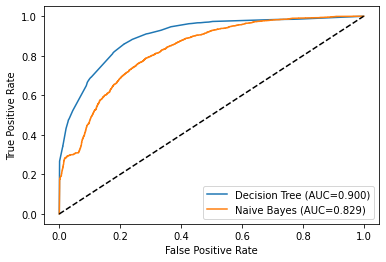

In [9]:
# Plot the ROC curves
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC={auc_dt:.3f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC={auc_nb:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


From the above ROC curve comparison, we can see that the Decision Tree model performs better than the Naive Bayes model. The Decision Tree model has a higher AUC score and its ROC curve is closer to the top-left corner of the plot, indicating better performance. The Naive Bayes model has a lower AUC score and its ROC curve is closer to the diagonal line, indicating poorer performance.

